In [1162]:
# Imports 

# Pandas: Data manipulation and analysis
import pandas as pd

# NumPy: Scientific computing with arrays, array manipulation
import numpy as np

# Matplotlib: Plotting library
import matplotlib.pyplot as plt

# sys: Access system-specific parameters and functions
import sys

# os: Interact with the operating system
import os

# importlib: Dynamic module import
import importlib

# contextlib: Utilities for working with context managers
from contextlib import contextmanager

In [1163]:
# Context manager to temporarily add a directory to sys.path
# This ensures the directory is added to sys.path when entering the context
# and removed from sys.path when exiting the context
@contextmanager
def add_sys_path(path):
    """
    Temporarily adds the specified path to sys.path.

    Parameters:
    path (str): The directory path to add to sys.path.

    Yields:
    None
    """
    # Check if the specified path is already in sys.path
    if path not in sys.path:
        # If not, append the path to sys.path
        sys.path.append(path)
    try:
        # Yield control back to the calling context
        # Code within the 'with' block will execute at this point
        yield
    finally:
        # This block will always execute upon exiting the context
        # Check if the path is in sys.path
        if path in sys.path:
            # If it is, remove the path from sys.path
            sys.path.remove(path)

# Function to import and reload modules if necessary
def import_and_reload(module_name, path):
    """
    Imports and reloads the specified module from the given path.

    Parameters:
    module_name (str): The name of the module to import and reload.
    path (str): The directory path where the module is located.

    Returns:
    module: The imported and reloaded module.
    """
    # Use the add_sys_path context manager to temporarily add the path to sys.path
    with add_sys_path(path):
        # Import the module using its name
        module = importlib.import_module(module_name)
        # Reload the module to ensure any changes are reflected
        importlib.reload(module)
        # Return the imported and reloaded module
        return module


In [1164]:
# Setting working directory

# Define the path to the working directory
working_directory = '/Users/ruzejjur/Github/TMoCOBoT_python'

# Change the current working directory to the specified path
os.chdir(working_directory)

In [1165]:
# Add and import auxiliary script
auxiliary_path = os.path.abspath(os.path.join(working_directory, 'code', 'auxiliary'))
auxiliary = import_and_reload('auxiliary', auxiliary_path)

# Add and import testing script
testing_path = os.path.abspath(os.path.join(working_directory, 'code', 'auxiliary'))
testing = import_and_reload('testing', testing_path)

# Simulated examples

To simplify the analysis, specific parameters are defined for the experts, which include the following:

 - 10 experts for each brand. 
 - 3 mobile brands.
 - 3 features.
 - 6 score values.

These parameters have been deliberately chosen to configure the system and demonstrate the functionality of our proposed solution.

The parameters associated with the primary modeler are as follows:

 - The preference score $r_{I,n}$ = 4 for all features.
 - The primary modeler's brand $P_{I}(B)$ preference follows a uniform distribution.
 - The primary modeler's opinion on brands $b\in{B}$ is established in the experimental setup.
 - The primary modeler's certainty $c_{I,b,n} \in \langle 0, 1 \rangle$ is established in the experimental setup.
 - The primary modeler's trust $t_{I,E_{i}} \in \langle 0, 1 \rangle$ is established in the experimental setup.

The preference score is set for simplicity, eliminating one hyperparameter to tune. 
The primary modeler's brand preference $P_{I}(B)$ is configured to ensure that the choice of the brand $b\in{B}$ is not influenced by the primary modeler's bias.

The objective is to design experiments in such a way that the brand selection process can be inferred from the setup of the experts.

In the following five examples, the primary modeler's opinions are presented in the following table:

In [1166]:
# The primary modeler's opinion

# Array representing the scores given by the primary modeler for different phone brands and features
# * Note 1: This array represents primary modelers opinion
primary_modeler_scores = np.array([
    [5, 4, 5],  # Scores for Brand_1
    [6, 5, 6],  # Scores for Brand_2
    [4, 4, 3]   # Scores for Brand_3
], dtype=np.int8)


In [1167]:
# Creating a DataFrame with the given data
# Index represents phone brands, and columns represent different features
primary_modeler_scores_df = pd.DataFrame(
    primary_modeler_scores,
    index=["Brand 1", "Brand 2", "Brand 3"],  # Setting the row labels for phone brands
    columns=["Feature 1", "Feature 2", "Feature 3"]  # Setting the column labels for features
)

# Display the DataFrame
primary_modeler_scores_df

,Feature 1,Feature 2,Feature 3
Brand 1,5,4,5
Brand 2,6,5,6
Brand 3,4,4,3


The primary modeler's opinion on brands is as follows: **Brand_2 > Brand_1 > Brand_3**.

## Opinion Merging and Preference Sub-setting

The aim of this section is to illustrate the influence of expert opinions on the primary modeler's brand preference.

### Example 1
The experts are configured to prefer the brands in the following order:

 **Brand_1 > Brand_2 > Brand_3**.

The Brand_1 is slightly more preferred than Brand_2, this is set up for later demonstration of the trust value $t_{I,E_{i}}$ in 'Inclusion of trust' section.

#### Experiment setup

##### Agent

In [1168]:
# Converting the primary modeler's scores to a DataFrame for better readability

# Creating a DataFrame with the given data
# Index represents phone brands, and columns represent different features
primary_modeler_scores_df = pd.DataFrame(
    primary_modeler_scores,
    index=["Brand 1", "Brand 2", "Brand 3"],  # Setting the row labels for phone brands
    columns=["Feature 1", "Feature 2", "Feature 3"]  # Setting the column labels for features
)

# Printing the DataFrame
print("The Primary Modeler's Scores:")
primary_modeler_scores_df

The Primary Modeler's Scores:


,Feature 1,Feature 2,Feature 3
Brand 1,5,4,5
Brand 2,6,5,6
Brand 3,4,4,3


In [1169]:
# Setting up the opinion certainty

# Array representing the certainty of the primary modeler's opinion for each phone brand
# ! Note 1: ones does not equate to no certainty being applied as the opinion certainty is multiplied with number of responders
opinion_certainty_array = np.array([1, 1, 1], dtype=np.float16)

# Boolean flag to determine if certainty should be applied
# * Note 1: This flag is important as setting it to True will ensure that the opinion certainty array is ones.
apply_certainty = False


In [1170]:
# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded

# Array representing the number of responders for each phone brand
number_of_responders = np.array([10, 10, 10], dtype=np.int32)

In [1171]:
# Create a trust matrix with ones, representing equal trust for each responder
# The matrix has 3 rows (one for each phone brand) and 10 columns (one for each responder)
# * Note 1: Setting trust like this is equivalent to no inclusion of trust
trust_matrix = np.ones((3, 10),dtype=np.float16)

In [1172]:
# Primary modeler's score preference for each feature

# Array representing the primary modeler's score preference for each feature
# * Note 1: This means that scores below the selected scores are not taken into acoount durring the opinion formulation
primary_modeler_score_preference = np.array([4, 4, 4], dtype=np.int8)

In [1173]:
# Primary modeler's brand preference

# Array representing the primary modeler's initial brand preference
# * Note 1: Set to uniform
primary_modeler_brand_pref = np.array([1, 1, 1], dtype=np.int8)

# Normalize the brand preference so that the sum equals 1
primary_modeler_brand_pref = primary_modeler_brand_pref / np.sum(primary_modeler_brand_pref)


In [1174]:
# Setting score range

# This represents the highest possible score for each feature, i.e., score range = 'best'
score_range = 6

In [1175]:
# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value

# Initial feature weight for the Dirichlet distribution
initial_feature_weight = 0.01


#### Expert opinions

The opinion's of individual experts $E_{i}$ for each brand $b\in{B}$.

In [1176]:
# Simulated experts for Brand_1
# Array representing the opinions of 10 simulated experts on Brand_1 for 3 features
Brand_1_expert_opinions = np.array([
    [4, 3, 4], [5, 3, 5], [5, 6, 5], [6, 5, 3], [6, 6, 6], 
    [5, 6, 5], [6, 6, 5], [6, 3, 4], [4, 5, 4], [6, 4, 3]
], dtype=np.int8)

# Simulated experts for Brand_2
# Array representing the opinions of 10 simulated experts on Brand_2 for 3 features
Brand_2_expert_opinions = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
], dtype=np.int8)

# Simulated experts for Brand_3
# Array representing the opinions of 10 simulated experts on Brand_3 for 3 features
Brand_3_expert_opinions = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
], dtype=np.int8)


In [1177]:
# Creating DataFrames for each brand

# DataFrame for Brand_1 expert opinions
Brand_1_expert_opinions_df = pd.DataFrame(
    Brand_1_expert_opinions, 
    index=[f"Brand_1 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_2 expert opinions
Brand_2_expert_opinions_df = pd.DataFrame(
    Brand_2_expert_opinions,
    index=[f"Brand_2 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_3 expert opinions
Brand_3_expert_opinions_df = pd.DataFrame(
    Brand_3_expert_opinions, 
    index=[f"Brand_3 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)


In [1178]:
print("Brand_1 Experts' Opinions:")
Brand_1_expert_opinions_df

Brand_1 Experts' Opinions:


,Feature 1 score,Feature 2 score,Feature 3 score
Brand_1 expert 1,4,3,4
Brand_1 expert 2,5,3,5
Brand_1 expert 3,5,6,5
Brand_1 expert 4,6,5,3
Brand_1 expert 5,6,6,6
Brand_1 expert 6,5,6,5
Brand_1 expert 7,6,6,5
Brand_1 expert 8,6,3,4
Brand_1 expert 9,4,5,4
Brand_1 expert 10,6,4,3


In [1179]:
print("\nBrand_2 Experts' Opinions:")
Brand_2_expert_opinions_df


Brand_2 Experts' Opinions:


,Feature 1 score,Feature 2 score,Feature 3 score
Brand_2 expert 1,5,5,5
Brand_2 expert 2,5,6,5
Brand_2 expert 3,3,4,4
Brand_2 expert 4,3,4,5
Brand_2 expert 5,4,5,5
Brand_2 expert 6,5,6,4
Brand_2 expert 7,6,6,6
Brand_2 expert 8,5,6,6
Brand_2 expert 9,4,3,4
Brand_2 expert 10,4,6,3


In [1180]:
print("\nBrand_3 Experts' Opinions:")
Brand_3_expert_opinions_df


Brand_3 Experts' Opinions:


,Feature 1 score,Feature 2 score,Feature 3 score
Brand_3 expert 1,3,4,3
Brand_3 expert 2,3,3,4
Brand_3 expert 3,4,3,4
Brand_3 expert 4,3,3,3
Brand_3 expert 5,5,4,3
Brand_3 expert 6,3,5,5
Brand_3 expert 7,4,5,6
Brand_3 expert 8,4,3,2
Brand_3 expert 9,3,4,3
Brand_3 expert 10,4,3,4


<ins>Simple inference of experts opinion of brands</ins>

/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_98799/841215693.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)


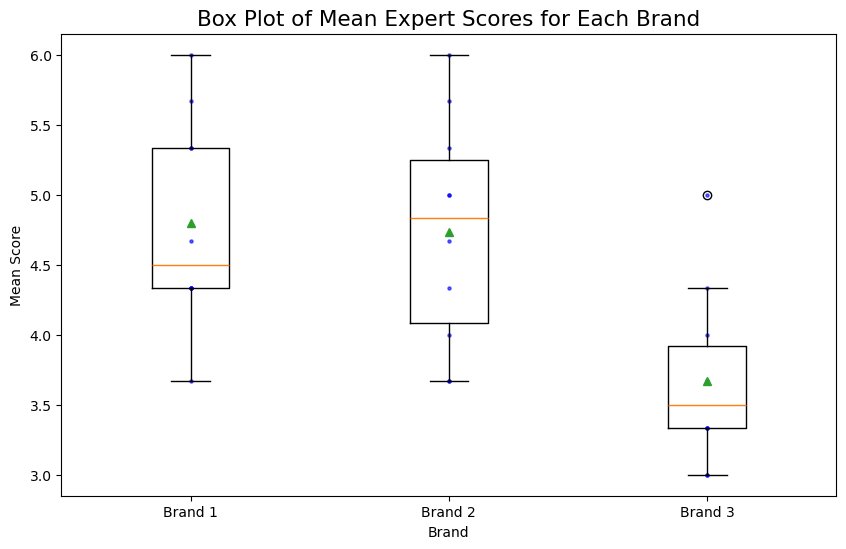

In [1181]:
# Calculate the mean scores of each expert
Brand_1_means = Brand_1_expert_opinions_df.mean(axis=1)
Brand_2_means = Brand_2_expert_opinions_df.mean(axis=1)
Brand_3_means = Brand_3_expert_opinions_df.mean(axis=1)

# Create a box plot for each brand
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)
ax.set_title('Box Plot of Mean Expert Scores for Each Brand', fontsize=15.5)
ax.set_ylabel('Mean Score')
ax.set_xlabel('Brand')

# Adding scatter plot of the observations
x_positions = [1, 2, 3]
for i, means in enumerate([Brand_1_means, Brand_2_means, Brand_3_means]):
    ax.scatter([x_positions[i]] * len(means), means, alpha=0.6, color='blue', s=5)

# Save the figure in .eps format

# save_path = os.path.join(working_directory, 'Bar_charts', 'brand_mean_scores_boxplot.eps')
# plt.tight_layout()
# plt.savefig(save_path, format='eps')

# Show the plot
plt.show()


<ins>The primary modeler's brand preference after opinion merging.</ins>

In [1182]:
# Running the simulated example from the auxiliary module

# Call the simulated_example function with the provided parameters
_, primary_modeler_posterior_updated = auxiliary.simulated_example(
    primary_modeler_scores,  # Initial scores given by the primary modeler
    opinion_certainty_array,  # Certainty of the primary modeler's opinions
    apply_certainty,  # Flag to apply certainty
    number_of_responders,  # Number of responders for each brand
    trust_matrix,  # Trust matrix representing trust for each responder
    primary_modeler_score_preference,  # Primary modeler's score preference for each feature
    primary_modeler_brand_pref,  # Distribution representing primary modeler's brand prefference
    score_range,  # Highest possible score for each feature
    initial_feature_weight,  # Initial feature weight for the Dirichlet distribution
    Brand_1_expert_opinions,  # Expert opinions for Brand_1
    Brand_2_expert_opinions,  # Expert opinions for Brand_2
    Brand_3_expert_opinions  # Expert opinions for Brand_3
)


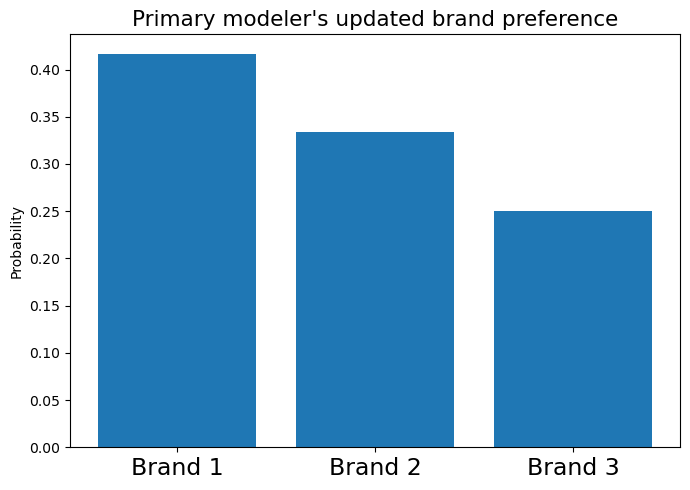

In [1183]:
## Plot primary modeler's updated posterior distribution on brands

# Variable names for the x-ticks
variable_names = ['Brand 1', 'Brand 2', 'Brand 3']

# Create a figure window with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

# Plotting the updated posterior distribution as a bar chart
ax.bar(variable_names, primary_modeler_posterior_updated)
ax.set_ylabel('Probability')
ax.set_title("Primary modeler's updated brand preference", fontsize=15.5)
ax.tick_params(axis='x', labelsize=17)

# Save the figure in .eps format
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_0.eps')
plt.tight_layout()
plt.savefig(save_path, format='eps')

# Show the plot
plt.show()


<ins>The primary modeler's updated brand preference.</ins>

In [1184]:
# Round the values and convert them to percentage strings
primary_modeler_posterior_updated_percent = [f"{value * 100:.2f}%" for value in primary_modeler_posterior_updated]

# Create a DataFrame for the updated posterior percentages
primary_modeler_posterior_updated_df = pd.DataFrame(
    [primary_modeler_posterior_updated_percent],    # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]         # Column labels for the DataFrame
)

# Display the DataFrame
print("The Primary modeler's updated brand preference:")
primary_modeler_posterior_updated_df

The Primary modeler's updated brand preference:


,Brand 1,Brand 2,Brand 3
0,41.65%,33.33%,25.02%


The results suggest that the experts influenced the primary modeler's opinion to favour the Brand_1 brand. Additionally, the primary modeler's probability of choosing the Brand_3 brand prior to opinion merging is low due to the low score assigned to feature 3 for the Brand_3 brand.  Consequently, this leads to a low probability entering the posterior distribution before opinion merging, significantly reducing the probability of selecting the Brand_3 brand.

### Example 2

#### Experiment setup

##### Agent

In [1185]:
# Creating a DataFrame with the given data
# Index represents phone brands, and columns represent different features
primary_modeler_scores_df = pd.DataFrame(
    primary_modeler_scores,
    index=["Brand 1", "Brand 2", "Brand 3"],           # Setting the row labels for phone brands
    columns=["Feature 1", "Feature 2", "Feature 3"]  # Setting the column labels for features
)

# Display the DataFrame
primary_modeler_scores_df

,Feature 1,Feature 2,Feature 3
Brand 1,5,4,5
Brand 2,6,5,6
Brand 3,4,4,3


In [1186]:
# Setting up the opinion certainty

# Array representing the certainty of the primary modeler's opinion for each phone brand
# ! Note 1: ones does not equate to no certainty being applied as the opinion certainty is multiplied with number of responders
opinion_certainty_array = np.array([1, 1, 1], dtype = np.float16)

# Boolean flag to determine if certainty should be applied
# * Note 1: This flag is important as setting it to True will ensure that the opinion certainty array is ones.
apply_certainty = False

In [1187]:
# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded

# Array representing the number of responders for each phone brand
number_of_responders = np.array([10, 10, 10], dtype = np.int32)

In [1188]:
# Create a trust matrix with ones, representing equal trust for each responder
# The matrix has 3 rows (one for each phone brand) and 10 columns (one for each responder)
# * Note 1: Setting trust like this is equivalent to no inclusion of trust
trust_matrix = np.ones((3, 10), dtype=np.float16)

In [1189]:
# Primary modeler's score preference for each feature

# Array representing the primary modeler's score preference for each feature
# * Note 1: This means that scores below the selected scores are not taken into acoount durring the opinion formulation
primary_modeler_score_preference = np.array([4, 4, 4], dtype=np.int8)

In [1190]:
# Primary modeler's brand preference

# Array representing the primary modeler's initial brand preference
# * Note 1: Set to uniform
primary_modeler_brand_pref = np.array([1, 1, 1], dtype=np.float16)

# Normalize the brand preference so that the sum equals 1
primary_modeler_brand_pref = primary_modeler_brand_pref / np.sum(primary_modeler_brand_pref)

In [1191]:
# Setting score range

# This represents the highest possible score for each feature, i.e., score range = 'best'
score_range = 6

In [1192]:
# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value

# Initial feature weight for the Dirichlet distribution
initial_feature_weight = 0.01

##### Expert opinons

The experts are configured to prefer the brands in the following order:

 **Brand_1 $\approx$ Brand_2 $\approx$ Brand_3**, 

the scores are set up to similar **<ins>high</ins>** values.

In [1193]:
# Simulated experts for Brand_1
# Array representing the opinions of 10 simulated experts on Brand_1 for 3 features
Brand_1_expert_opinions = np.array([
    [6, 5, 6], [5, 5, 5], [6, 5, 5], [5, 5, 6], [6, 6, 6],
    [5, 6, 5], [6, 5, 5], [6, 5, 5], [5, 6, 6], [6, 5, 5]
], dtype=np.int8)

# Simulated experts for Brand_2
# Array representing the opinions of 10 simulated experts on Brand_2 for 3 features
Brand_2_expert_opinions = np.array([
    [5, 6, 5], [6, 5, 5], [6, 5, 6], [5, 6, 5], [6, 6, 5],
    [6, 5, 6], [6, 6, 6], [6, 5, 6], [5, 6, 5], [6, 6, 6]
], dtype=np.int8)

# Simulated experts for Brand_3
# Array representing the opinions of 10 simulated experts on Brand_3 for 3 features
Brand_3_expert_opinions = np.array([
    [5, 5, 6], [6, 5, 6], [6, 6, 6], [6, 6, 6], [6, 5, 6],
    [6, 5, 5], [6, 5, 6], [5, 5, 6], [6, 6, 5], [5, 6, 5]
], dtype=np.int8)

In [1194]:
# Creating DataFrames for each brand

# DataFrame for Brand_1 expert opinions
Brand_1_expert_opinions_df = pd.DataFrame(
    Brand_1_expert_opinions, 
    index=[f"Brand_1 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_2 expert opinions
Brand_2_expert_opinions_df = pd.DataFrame(
    Brand_2_expert_opinions,
    index=[f"Brand_2 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_3 expert opinions
Brand_3_expert_opinions_df = pd.DataFrame(
    Brand_3_expert_opinions, 
    index=[f"Brand_3 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)


<ins>Simple inference of experts opinion of brands</ins>

/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_98799/3988871084.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)


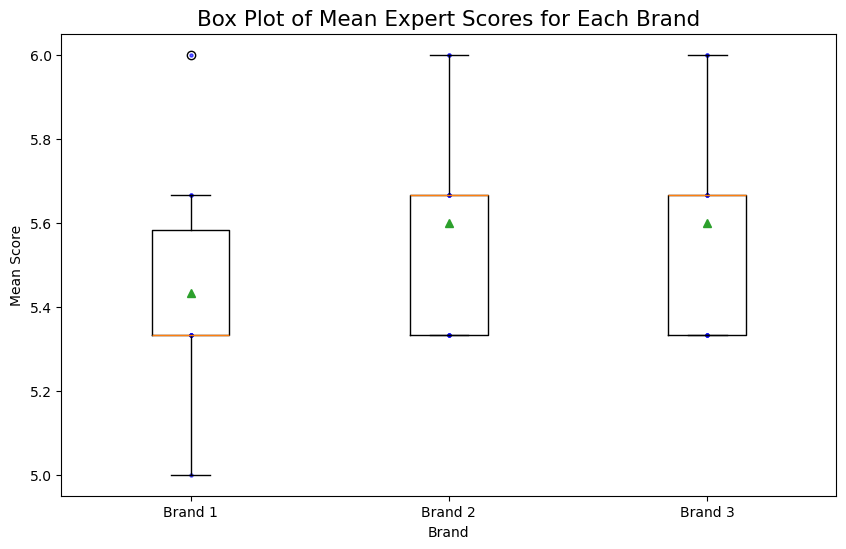

In [1195]:
# Calculate the mean scores of each expert
Brand_1_means = Brand_1_expert_opinions_df.mean(axis=1)
Brand_2_means = Brand_2_expert_opinions_df.mean(axis=1)
Brand_3_means = Brand_3_expert_opinions_df.mean(axis=1)

# Create a box plot for each brand
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)
ax.set_title('Box Plot of Mean Expert Scores for Each Brand', fontsize=15.5)
ax.set_ylabel('Mean Score')
ax.set_xlabel('Brand')

# Adding scatter plot of the observations
x_positions = [1, 2, 3]
for i, means in enumerate([Brand_1_means, Brand_2_means, Brand_3_means]):
    ax.scatter([x_positions[i]] * len(means), means, alpha=0.6, color='blue', s=5)

# Save the figure in .eps format
# save_path = os.path.join(working_directory, 'Bar_charts', 'brand_mean_scores_boxplot.eps')
# plt.tight_layout()
# plt.savefig(save_path, format='eps')

# Show the plot
plt.show()


In [1196]:
# Running the simulated example from the auxiliary module

# Call the simulated_example function with the provided parameters
_, primary_modeler_posterior_updated = auxiliary.simulated_example(
    primary_modeler_scores,  # Initial scores given by the primary modeler
    opinion_certainty_array,  # Certainty of the primary modeler's opinions
    apply_certainty,  # Flag to apply certainty
    number_of_responders,  # Number of responders for each brand
    trust_matrix,  # Trust matrix representing trust for each responder
    primary_modeler_score_preference,  # Primary modeler's score preference for each feature
    primary_modeler_brand_pref,  # Distribution representing primary modeler's brand prefference
    score_range,  # Highest possible score for each feature
    initial_feature_weight,  # Initial feature weight for the Dirichlet distribution
    Brand_1_expert_opinions,  # Expert opinions for Brand_1
    Brand_2_expert_opinions,  # Expert opinions for Brand_2
    Brand_3_expert_opinions  # Expert opinions for Brand_3
)


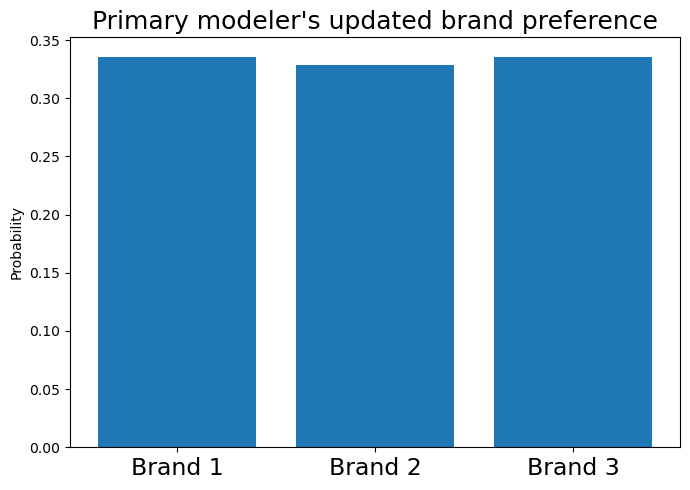

In [1197]:
# Create a figure window
plt.figure(figsize=(7, 5))

# Plot the primary modeler's updated posterior distribution on brands
plt.bar(['Brand 1', 'Brand 2', 'Brand 3'], primary_modeler_posterior_updated)

# Set the font size for the x-ticks
plt.xticks(fontsize=17)

# Label the y-axis and set the title
plt.ylabel('Probability')
plt.title("Primary modeler's updated brand preference", fontsize=18)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_1.eps')
plt.tight_layout()
plt.savefig(save_path, format='eps')

# Display the plot
plt.show()


<ins>The primary modeler's updated brand preference.</ins>

In [1198]:
# Round the values and convert them to percentage strings
primary_modeler_posterior_updated_percent = [f"{value * 100:.2f}%" for value in primary_modeler_posterior_updated]

# Create a DataFrame for the updated posterior percentages
primary_modeler_posterior_updated_df = pd.DataFrame(
    [primary_modeler_posterior_updated_percent],    # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]         # Column labels for the DataFrame
)

# Display the DataFrame
print("The Primary modeler's updated brand preference:")
primary_modeler_posterior_updated_df

The Primary modeler's updated brand preference:


,Brand 1,Brand 2,Brand 3
0,33.56%,32.88%,33.56%


Comment on this result are at the end of this section.

### Example 3

The experts are configured to prefer the brands in the following order:

**Brand_1 $\approx$ Brand_2 $\approx$ Brand_3**, 
                      
the scores are set up to similar **<ins>low</ins>** values.

#### Experiment setup

##### Agent

In [1199]:
# Creating a DataFrame with the given data
# Index represents phone brands, and columns represent different features
primary_modeler_scores_df = pd.DataFrame(
    primary_modeler_scores,
    index=["Brand 1", "Brand 2", "Brand 3"],           # Setting the row labels for phone brands
    columns=["Feature 1", "Feature 2", "Feature 3"]  # Setting the column labels for features
)

# Display the DataFrame
primary_modeler_scores_df

,Feature 1,Feature 2,Feature 3
Brand 1,5,4,5
Brand 2,6,5,6
Brand 3,4,4,3


In [1200]:
# Setting up the opinion certainty

# Array representing the certainty of the primary modeler's opinion for each phone brand
# ! Note 1: ones does not equate to no certainty being applied as the opinion certainty is multiplied with number of responders
opinion_certainty_array = np.array([1, 1, 1], dtype=np.float16)

# Boolean flag to determine if certainty should be applied
# * Note 1: This flag is important as setting it to True will ensure that the opinion certainty array is ones.
apply_certainty = False


In [1201]:
# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded

# Array representing the number of responders for each phone brand
number_of_responders = np.array([10, 10, 10], dtype=np.int32)

In [1202]:
# Create a trust matrix with ones, representing equal trust for each responder
# The matrix has 3 rows (one for each phone brand) and 10 columns (one for each responder)
# * Note 1: Setting trust like this is equivalent to no inclusion of trust
trust_matrix = np.ones((3, 10), dtype=np.float16)

In [1203]:
# Primary modeler's score preference for each feature

# Array representing the primary modeler's score preference for each feature
# * Note 1: This means that scores below the selected scores are not taken into acoount durring the opinion formulation
primary_modeler_score_preference = np.array([4, 4, 4], dtype=np.int8)

In [1204]:
# Primary modeler's brand preference

# Array representing the primary modeler's initial brand preference
# * Note 1: Set to uniform
primary_modeler_brand_pref = np.array([1, 1, 1], dtype=np.float32)

# Normalize the brand preference so that the sum equals 1
primary_modeler_brand_pref = primary_modeler_brand_pref / np.sum(primary_modeler_brand_pref)


In [1205]:
# Setting score range

# This represents the highest possible score for each feature, i.e., score range = 'best'
score_range = 6

In [1206]:
# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value

# Initial feature weight for the Dirichlet distribution
initial_feature_weight = 0.01


#### Expert opinions

In [1207]:
# Simulated experts for Brand_1
# Array representing the opinions of 10 simulated experts on Brand_1 for 3 features
Brand_1_expert_opinions = np.array([
    [3, 4, 4], [3, 4, 4], [4, 4, 4], [4, 3, 3], [4, 3, 3],
    [4, 4, 1], [4, 1, 4], [4, 3, 4], [4, 5, 4], [4, 4, 3]
], dtype=np.int8)

# Simulated experts for Brand_2
# Array representing the opinions of 10 simulated experts on Brand_2 for 3 features
Brand_2_expert_opinions = np.array([
    [4, 4, 4], [4, 3, 4], [4, 4, 4], [4, 4, 2], [4, 3, 4],
    [3, 4, 1], [4, 4, 4], [2, 4, 4], [1, 4, 4], [3, 2, 1]
], dtype=np.int8)

# Simulated experts for Brand_3
# Array representing the opinions of 10 simulated experts on Brand_3 for 3 features
Brand_3_expert_opinions = np.array([
    [4, 4, 4], [4, 4, 4], [3, 5, 4], [4, 4, 4], [2, 1, 4],
    [4, 4, 5], [3, 4, 2], [4, 3, 4], [4, 4, 1], [1, 2, 3]
], dtype=np.int8)


In [1208]:
# Creating DataFrames for each brand

# DataFrame for Brand_1 expert opinions
Brand_1_expert_opinions_df = pd.DataFrame(
    Brand_1_expert_opinions, 
    index=[f"Brand_1 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_2 expert opinions
Brand_2_expert_opinions_df = pd.DataFrame(
    Brand_2_expert_opinions,
    index=[f"Brand_2 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_3 expert opinions
Brand_3_expert_opinions_df = pd.DataFrame(
    Brand_3_expert_opinions, 
    index=[f"Brand_3 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)


<ins>Simple inference of experts opinion of brands</ins>

/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_98799/841215693.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)


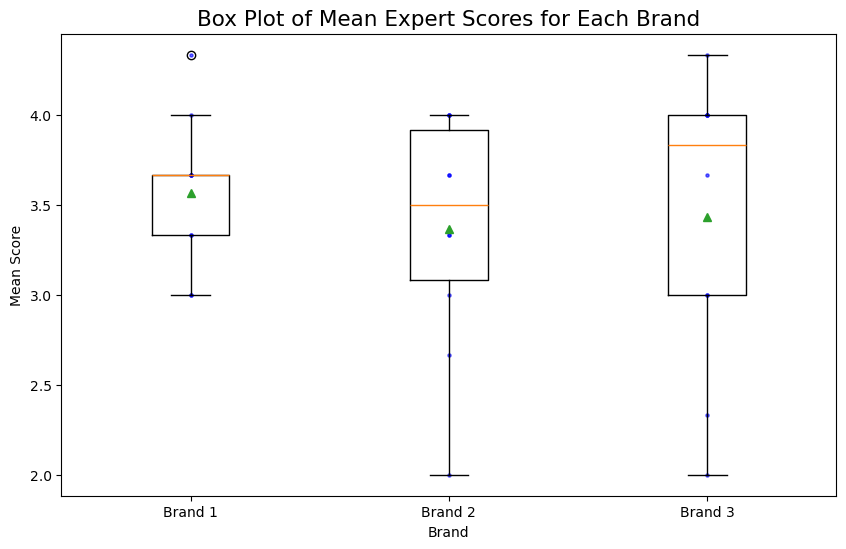

In [1209]:
# Calculate the mean scores of each expert
Brand_1_means = Brand_1_expert_opinions_df.mean(axis=1)
Brand_2_means = Brand_2_expert_opinions_df.mean(axis=1)
Brand_3_means = Brand_3_expert_opinions_df.mean(axis=1)

# Create a box plot for each brand
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)
ax.set_title('Box Plot of Mean Expert Scores for Each Brand', fontsize=15.5)
ax.set_ylabel('Mean Score')
ax.set_xlabel('Brand')

# Adding scatter plot of the observations
x_positions = [1, 2, 3]
for i, means in enumerate([Brand_1_means, Brand_2_means, Brand_3_means]):
    ax.scatter([x_positions[i]] * len(means), means, alpha=0.6, color='blue', s=5)

# Save the figure in .eps format

# save_path = os.path.join(working_directory, 'Bar_charts', 'brand_mean_scores_boxplot.eps')
# plt.tight_layout()
# plt.savefig(save_path, format='eps')

# Show the plot
plt.show()


In [1210]:
# Running the simulated example from the auxiliary module

# Call the simulated_example function with the provided parameters
_, primary_modeler_posterior_updated = auxiliary.simulated_example(
    primary_modeler_scores,  # Initial scores given by the primary modeler
    opinion_certainty_array,  # Certainty of the primary modeler's opinions
    apply_certainty,  # Flag to apply certainty
    number_of_responders,  # Number of responders for each brand
    trust_matrix,  # Trust matrix representing trust for each responder
    primary_modeler_score_preference,  # Primary modeler's score preference for each feature
    primary_modeler_brand_pref,  # Distribution representing primary modeler's brand prefference
    score_range,  # Highest possible score for each feature
    initial_feature_weight,  # Initial feature weight for the Dirichlet distribution
    Brand_1_expert_opinions,  # Expert opinions for Brand_1
    Brand_2_expert_opinions,  # Expert opinions for Brand_2
    Brand_3_expert_opinions  # Expert opinions for Brand_3
)


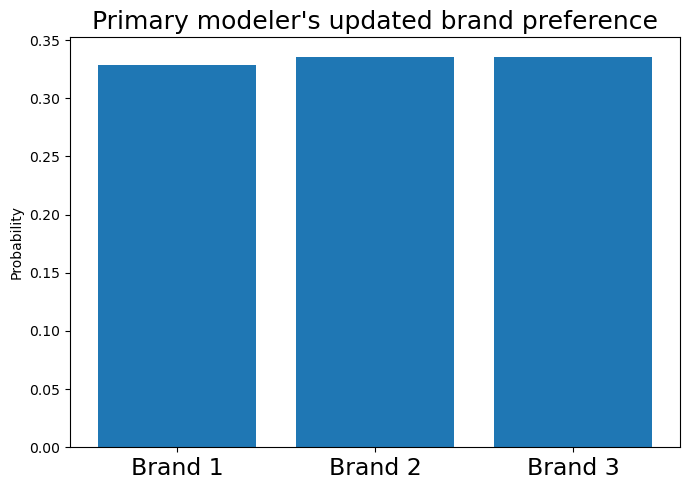

In [1211]:
# Create a figure window
plt.figure(figsize=(7, 5))

# Plot the primary modeler's updated posterior distribution on brands
plt.bar(['Brand 1', 'Brand 2', 'Brand 3'], primary_modeler_posterior_updated)

# Set the font size for the x-ticks
plt.xticks(fontsize=17)

# Label the y-axis and set the title
plt.ylabel('Probability')
plt.title("Primary modeler's updated brand preference", fontsize=18)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_2.eps')
plt.tight_layout()
plt.savefig(save_path, format='eps')

# Display the plot
plt.show()

<ins>The primary modeler's updated brand preference.</ins>

In [1212]:
# Round the values and convert them to percentage strings
primary_modeler_posterior_updated_percent = [f"{value * 100:.2f}%" for value in primary_modeler_posterior_updated]

# Create a DataFrame for the updated posterior percentages
primary_modeler_posterior_updated_df = pd.DataFrame(
    [primary_modeler_posterior_updated_percent],    # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]         # Column labels for the DataFrame
)

# Display the DataFrame
print("The Primary modeler's updated brand preference:")
primary_modeler_posterior_updated_df

The Primary modeler's updated brand preference:


,Brand 1,Brand 2,Brand 3
0,32.88%,33.56%,33.56%


The results of the last two experiments show only a minor difference in the final brand preference. However, it was expected that the primary modeler's opinion would have a stronger influence, pushing the preference towards the following order: **Brand_2 > Brand_1 > Brand_3**.

This is attributed to the fact that each expert's contribution to the updated weight $V_{f_{j,b}}$ has a magnitude of +1, and the primary modeler's contribution is also + 1. The cumulative effect of the experts' contributions diminishes the impact of the primary modeler's opinion.

To address this, the magnitude of the primary modeler's weights $n_{f_{1,b}}$ needs to be adjusted to ensure that the primary modeler's opinion is not diminished. Further elaboration on this adjustment will be provided in the section titled 'Inclusion of Opinion Certainty' below.

## Inclusion of trust
In this section, we are examining the integration of trust $t_{I,E_{i}}$, into each expert's $E_{i}$ opinion.  The previously mentioned issue still exists and will be addressed later.
For now, the primary modeler's opinion will be de-emphasized. This approach allows for a more precise demonstration of trust inclusion, free from any bias introduced by the primary modeler's opinion.
For simplicity, the setup of the following two experiments is the same as in the first example from the previous section.

### Example 1
We start by configuring low trust values $t_{I,E_{i}}$ for experts reacting to the Brand_1 brand and high trust values for experts reacting to Brand_2 and Brand_3. The expected outcome is that the preferred brand should be Brand_2, since it has similar score values provided by the experts' $E_{i}$ as Brand_1, with Brand_2 being slightly less favoured.

#### Experiment setup

##### Agent

In [1213]:
# The primary modeler's opinion

# Array representing the scores given by the primary modeler for different phone brands and features
# * Note 1: This array represents primary modelers opinion
primary_modeler_scores = np.array([
    [5, 4, 5],  # Scores for Brand_1
    [6, 5, 6],  # Scores for Brand_2
    [4, 4, 3]   # Scores for Brand_3
], dtype=np.int8)

In [1214]:
# Creating a DataFrame with the given data
# Index represents phone brands, and columns represent different features
primary_modeler_scores_df = pd.DataFrame(
    primary_modeler_scores,
    index=["Brand 1", "Brand 2", "Brand 3"],           # Setting the row labels for phone brands
    columns=["Feature 1", "Feature 2", "Feature 3"]  # Setting the column labels for features
)

# Display the DataFrame
primary_modeler_scores_df

,Feature 1,Feature 2,Feature 3
Brand 1,5,4,5
Brand 2,6,5,6
Brand 3,4,4,3


In [1215]:
# Setting up the opinion certainty

# Array representing the certainty of the primary modeler's opinion for each phone brand
# ! Note 1: ones does not equate to no certainty being applied as the opinion certainty is multiplied with number of responders
opinion_certainty_array = np.array([1, 1, 1], dtype=np.float16)

# Boolean flag to determine if certainty should be applied
# * Note 1: This flag is important as setting it to True will ensure that the opinion certainty array is ones.
apply_certainty = False

In [1216]:
# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded

# Array representing the number of responders for each phone brand
number_of_responders = np.array([10, 10, 10], dtype=np.int32)

In [1217]:
# Setting up trust in experts' opinions

# Trust matrix representing the trust levels for each expert's opinion
# Rows represent phone brands (Brand_1, Brand_2, Brand_3)
# Columns represent individual experts' trust levels
trust_matrix = np.array([
    [0.8, 0.9, 0.3, 0.7, 0.2, 0.2, 0.3, 0.5, 0.4, 0.9],  # Trust levels for Brand_1 experts
    [0.9, 0.9, 0.3, 0.3, 0.7, 0.7, 0.9, 0.9, 0.4, 0.4],  # Trust levels for Brand_2 experts
    [0.9, 0.7, 0.8, 0.8, 0.9, 0.8, 0.7, 0.7, 0.8, 0.9]   # Trust levels for Brand_3 experts
], dtype=np.float32)

In [1218]:
# Primary modeler's score preference for each feature

# Array representing the primary modeler's score preference for each feature
# * Note 1: This means that scores below the selected scores are not taken into acoount durring the opinion formulation
primary_modeler_score_preference = np.array([4, 4, 4], dtype=np.int8)

In [1219]:
# Primary modeler's brand preference

# Array representing the primary modeler's initial brand preference
# * Note 1: Set to uniform
primary_modeler_brand_pref = np.array([1, 1, 1], dtype=np.float32)

# Normalize the brand preference so that the sum equals 1
primary_modeler_brand_pref = primary_modeler_brand_pref / np.sum(primary_modeler_brand_pref)

In [1220]:
# Setting score range

# This represents the highest possible score for each feature, i.e., score range = 'best'
score_range = 6

In [1221]:
# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value

# Initial feature weight for the Dirichlet distribution
initial_feature_weight = 0.01

#### Expert opinions

The opinion's of individual experts $E_{i}$ for each brand $b\in{B}$.

In [1222]:
# Simulated experts for Brand_1
# Array representing the opinions of 10 simulated experts on Brand_1 for 3 features
Brand_1_expert_opinions = np.array([
    [4, 3, 4], [5, 3, 5], [5, 6, 5], [6, 5, 3], [6, 6, 6], 
    [5, 6, 5], [6, 6, 5], [6, 3, 4], [4, 5, 4], [6, 4, 3]
], dtype=np.int8)

# Simulated experts for Brand_2
# Array representing the opinions of 10 simulated experts on Brand_2 for 3 features
Brand_2_expert_opinions = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
], dtype=np.int8)

# Simulated experts for Brand_3
# Array representing the opinions of 10 simulated experts on Brand_3 for 3 features
Brand_3_expert_opinions = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
], dtype=np.int8)

In [1223]:
# Creating DataFrames for each brand

# DataFrame for Brand_1 expert opinions
Brand_1_expert_opinions_df = pd.DataFrame(
    Brand_1_expert_opinions, 
    index=[f"Brand_1 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_2 expert opinions
Brand_2_expert_opinions_df = pd.DataFrame(
    Brand_2_expert_opinions,
    index=[f"Brand_2 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_3 expert opinions
Brand_3_expert_opinions_df = pd.DataFrame(
    Brand_3_expert_opinions, 
    index=[f"Brand_3 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)


<ins>Simple inference of experts opinion of brands</ins>

/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_98799/841215693.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)


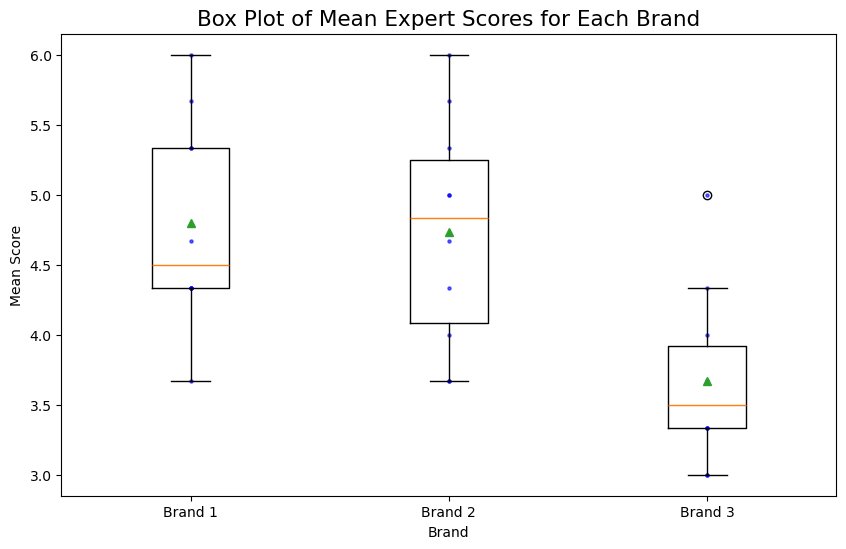

In [1224]:
# Calculate the mean scores of each expert
Brand_1_means = Brand_1_expert_opinions_df.mean(axis=1)
Brand_2_means = Brand_2_expert_opinions_df.mean(axis=1)
Brand_3_means = Brand_3_expert_opinions_df.mean(axis=1)

# Create a box plot for each brand
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)
ax.set_title('Box Plot of Mean Expert Scores for Each Brand', fontsize=15.5)
ax.set_ylabel('Mean Score')
ax.set_xlabel('Brand')

# Adding scatter plot of the observations
x_positions = [1, 2, 3]
for i, means in enumerate([Brand_1_means, Brand_2_means, Brand_3_means]):
    ax.scatter([x_positions[i]] * len(means), means, alpha=0.6, color='blue', s=5)

# Save the figure in .eps format

# save_path = os.path.join(working_directory, 'Bar_charts', 'brand_mean_scores_boxplot.eps')
# plt.tight_layout()
# plt.savefig(save_path, format='eps')

# Show the plot
plt.show()


In [1225]:
# Running the simulated example from the auxiliary module

# Call the simulated_example function with the provided parameters
_, primary_modeler_posterior_updated = auxiliary.simulated_example(
    primary_modeler_scores,  # Initial scores given by the primary modeler
    opinion_certainty_array,  # Certainty of the primary modeler's opinions
    apply_certainty,  # Flag to apply certainty
    number_of_responders,  # Number of responders for each brand
    trust_matrix,  # Trust matrix representing trust for each responder
    primary_modeler_score_preference,  # Primary modeler's score preference for each feature
    primary_modeler_brand_pref,  # Distribution representing primary modeler's brand prefference
    score_range,  # Highest possible score for each feature
    initial_feature_weight,  # Initial feature weight for the Dirichlet distribution
    Brand_1_expert_opinions,  # Expert opinions for Brand_1
    Brand_2_expert_opinions,  # Expert opinions for Brand_2
    Brand_3_expert_opinions  # Expert opinions for Brand_3
)

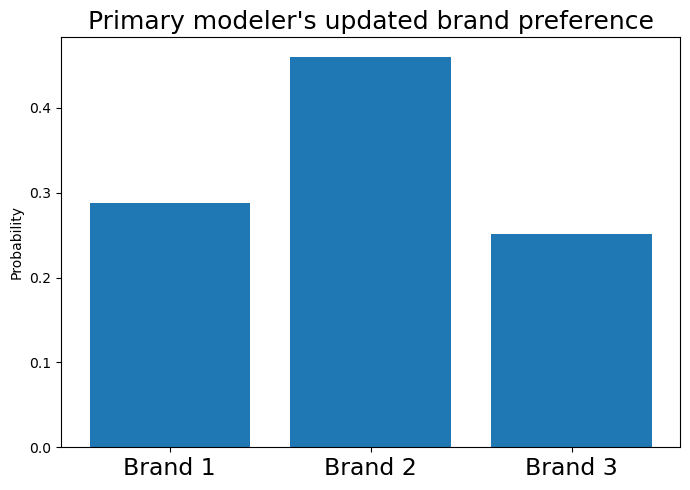

In [1226]:
# Create a figure window
plt.figure(figsize=(7, 5))

# Plot the primary modeler's updated posterior distribution on brands
plt.bar(['Brand 1', 'Brand 2', 'Brand 3'], primary_modeler_posterior_updated)

# Set the font size for the x-ticks
plt.xticks(fontsize=17)

# Label the y-axis and set the title
plt.ylabel('Probability')
plt.title("Primary modeler's updated brand preference", fontsize=18)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_3.eps')
plt.tight_layout()
plt.savefig(save_path, format='eps')

# Display the plot
plt.show()

<ins>The primary modeler's updated brand preference.</ins>

In [1227]:
# Round the values and convert them to percentage strings
primary_modeler_posterior_updated_percent = [f"{value * 100:.2f}%" for value in primary_modeler_posterior_updated]

# Create a DataFrame for the updated posterior percentages
primary_modeler_posterior_updated_df = pd.DataFrame(
    [primary_modeler_posterior_updated_percent],    # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]         # Column labels for the DataFrame
)

# Display the DataFrame
print("The Primary modeler's updated brand preference:")
primary_modeler_posterior_updated_df

The Primary modeler's updated brand preference:


,Brand 1,Brand 2,Brand 3
0,28.82%,46.02%,25.16%


### Example 2
Setting the trust $t_{I,E_{i}}$ for experts reacting to Brand_1 and Brand_2 brands to low values and to high values for Brand_3. The preferred brand should be Brand_3.

#### Experiment setup

##### Agent

In [1228]:
# The primary modeler's opinion

# Array representing the scores given by the primary modeler for different phone brands and features
# * Note 1: This array represents primary modelers opinion
primary_modeler_scores = np.array([
    [5, 4, 5],  # Scores for Brand_1
    [6, 5, 6],  # Scores for Brand_2
    [4, 4, 3]   # Scores for Brand_3
], dtype=np.int8)

In [1229]:
# Creating a DataFrame with the given data
# Index represents phone brands, and columns represent different features
primary_modeler_scores_df = pd.DataFrame(
    primary_modeler_scores,
    index=["Brand 1", "Brand 2", "Brand 3"],  # Setting the row labels for phone brands
    columns=["Feature 1", "Feature 2", "Feature 3"]  # Setting the column labels for features
)

# Display the DataFrame
primary_modeler_scores_df

,Feature 1,Feature 2,Feature 3
Brand 1,5,4,5
Brand 2,6,5,6
Brand 3,4,4,3


In [1230]:
# Setting up the opinion certainty

# Array representing the certainty of the primary modeler's opinion for each phone brand
# ! Note 1: ones does not equate to no certainty being applied as the opinion certainty is multiplied with number of responders
opinion_certainty_array = np.array([1, 1, 1], dtype=np.float16)

# Boolean flag to determine if certainty should be applied
# * Note 1: This flag is important as setting it to True will ensure that the opinion certainty array is ones.
apply_certainty = False

In [1231]:
# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded

# Array representing the number of responders for each phone brand
number_of_responders = np.array([10, 10, 10], dtype=np.int32)

In [1232]:
# Setting up trust in experts' opinions

# Trust matrix representing the trust levels for each expert's opinion
# Rows represent phone brands (Brand_1, Brand_2, Brand_3)
# Columns represent individual experts' trust levels
trust_matrix = np.array([
    [0.8, 0.9, 0.5, 0.9, 0.2, 0.2, 0.2, 0.5, 0.4, 0.9],  # Trust levels for Brand_1 experts
    [0.3, 0.3, 0.9, 0.9, 0.5, 0.5, 0.2, 0.2, 0.8, 0.8],  # Trust levels for Brand_2 experts
    [0.5, 0.7, 0.9, 0.2, 0.9, 0.8, 0.9, 0.7, 0.8, 0.9]   # Trust levels for Brand_3 experts
], dtype=np.float32)

In [1233]:
# Primary modeler's score preference for each feature

# Array representing the primary modeler's score preference for each feature
# * Note 1: This means that scores below the selected scores are not taken into acoount durring the opinion formulation
primary_modeler_score_preference = np.array([4, 4, 4], dtype=np.int8)

In [1234]:
# Primary modeler's brand preference

# Array representing the primary modeler's initial brand preference
# * Note 1: Set to uniform
primary_modeler_brand_pref = np.array([1, 1, 1], dtype=np.float32)

# Normalize the brand preference so that the sum equals 1
primary_modeler_brand_pref = primary_modeler_brand_pref / np.sum(primary_modeler_brand_pref)

In [1235]:
# Setting score range

# This represents the highest possible score for each feature, i.e., score range = 'best'
score_range = 6

In [1236]:
# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value

# Initial feature weight for the Dirichlet distribution
initial_feature_weight = 0.01

##### Expert opinions

In [1237]:
# Simulated experts for Brand_1
# Array representing the opinions of 10 simulated experts on Brand_1 for 3 features
Brand_1_expert_opinions = np.array([
    [4, 3, 4], [5, 3, 5], [5, 6, 5], [6, 5, 3], [6, 6, 6], 
    [5, 6, 5], [6, 6, 5], [6, 3, 4], [4, 5, 4], [6, 4, 3]
], dtype=np.int8)

# Simulated experts for Brand_2
# Array representing the opinions of 10 simulated experts on Brand_2 for 3 features
Brand_2_expert_opinions = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
], dtype=np.int8)

# Simulated experts for Brand_3
# Array representing the opinions of 10 simulated experts on Brand_3 for 3 features
Brand_3_expert_opinions = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
], dtype=np.int8)


In [1238]:
# Creating DataFrames for each brand

# DataFrame for Brand_1 expert opinions
Brand_1_expert_opinions_df = pd.DataFrame(
    Brand_1_expert_opinions, 
    index=[f"Brand_1 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_2 expert opinions
Brand_2_expert_opinions_df = pd.DataFrame(
    Brand_2_expert_opinions,
    index=[f"Brand_2 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_3 expert opinions
Brand_3_expert_opinions_df = pd.DataFrame(
    Brand_3_expert_opinions, 
    index=[f"Brand_3 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)


<ins>Simple inference of experts opinion of brands</ins>

/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_98799/841215693.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)


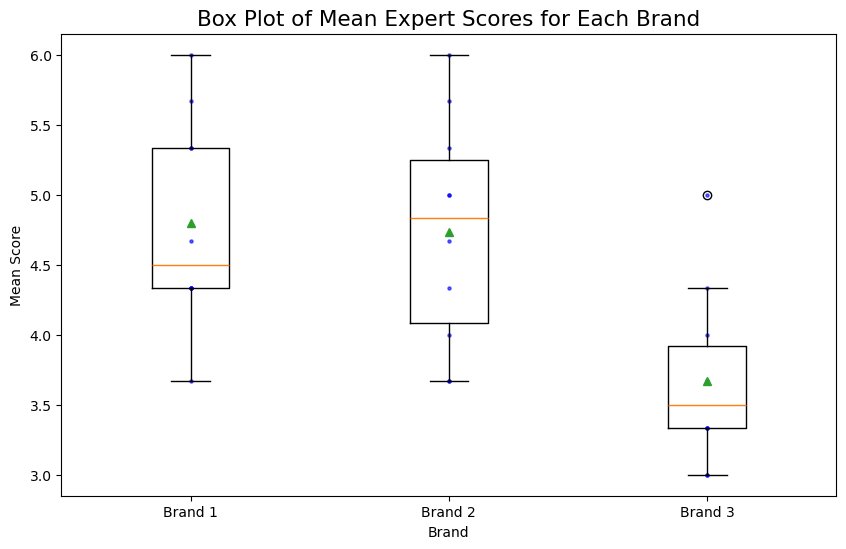

In [1239]:
# Calculate the mean scores of each expert
Brand_1_means = Brand_1_expert_opinions_df.mean(axis=1)
Brand_2_means = Brand_2_expert_opinions_df.mean(axis=1)
Brand_3_means = Brand_3_expert_opinions_df.mean(axis=1)

# Create a box plot for each brand
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)
ax.set_title('Box Plot of Mean Expert Scores for Each Brand', fontsize=15.5)
ax.set_ylabel('Mean Score')
ax.set_xlabel('Brand')

# Adding scatter plot of the observations
x_positions = [1, 2, 3]
for i, means in enumerate([Brand_1_means, Brand_2_means, Brand_3_means]):
    ax.scatter([x_positions[i]] * len(means), means, alpha=0.6, color='blue', s=5)

# Save the figure in .eps format

# save_path = os.path.join(working_directory, 'Bar_charts', 'brand_mean_scores_boxplot.eps')
# plt.tight_layout()
# plt.savefig(save_path, format='eps')

# Show the plot
plt.show()


In [1240]:
# Running the simulated example from the auxiliary module

# Call the simulated_example function with the provided parameters
_, primary_modeler_posterior_updated = auxiliary.simulated_example(
    primary_modeler_scores,  # Initial scores given by the primary modeler
    opinion_certainty_array,  # Certainty of the primary modeler's opinions
    apply_certainty,  # Flag to apply certainty
    number_of_responders,  # Number of responders for each brand
    trust_matrix,  # Trust matrix representing trust for each responder
    primary_modeler_score_preference,  # Primary modeler's score preference for each feature
    primary_modeler_brand_pref,  # Distribution representing primary modeler's brand prefference
    score_range,  # Highest possible score for each feature
    initial_feature_weight,  # Initial feature weight for the Dirichlet distribution
    Brand_1_expert_opinions,  # Expert opinions for Brand_1
    Brand_2_expert_opinions,  # Expert opinions for Brand_2
    Brand_3_expert_opinions  # Expert opinions for Brand_3
)


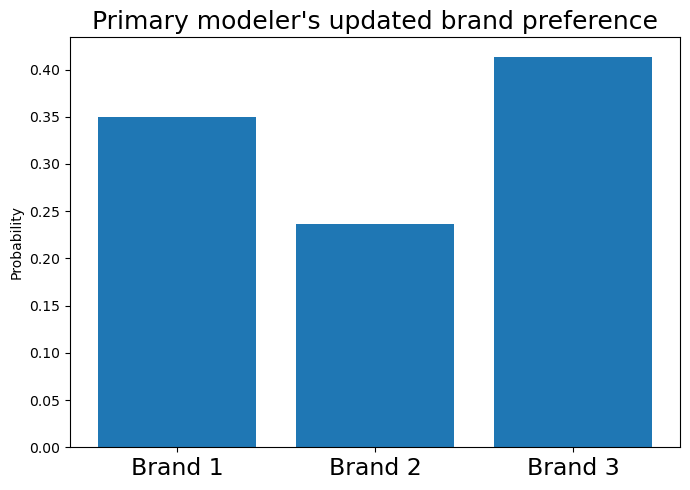

In [1241]:
# Create a figure window
plt.figure(figsize=(7, 5))

# Plot the primary modeler's updated posterior distribution on brands
plt.bar(['Brand 1', 'Brand 2', 'Brand 3'], primary_modeler_posterior_updated)

# Set the font size for the x-ticks
plt.xticks(fontsize=17)

# Label the y-axis and set the title
plt.ylabel('Probability')
plt.title("Primary modeler's updated brand preference", fontsize=18)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_4.eps')
plt.tight_layout()
plt.savefig(save_path, format='eps')

# Display the plot
plt.show()

<ins>The primary modeler's updated brand preference.</ins>

In [1242]:
# Round the values and convert them to percentage strings
primary_modeler_posterior_updated_percent = [f"{value * 100:.2f}%" for value in primary_modeler_posterior_updated]

# Create a DataFrame for the updated posterior percentages
primary_modeler_posterior_updated_df = pd.DataFrame(
    [primary_modeler_posterior_updated_percent],    # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]         # Column labels for the DataFrame
)

# Display the DataFrame
print("The Primary modeler's updated brand preference:")
primary_modeler_posterior_updated_df

The Primary modeler's updated brand preference:


,Brand 1,Brand 2,Brand 3
0,35.02%,23.63%,41.34%


The trust process works as intended.

### Inclusion of certainty
This section aims to provide a solution to the problem of setting the primary modeler's initial weights $n_{f_{1,b}}$ so that the primary modeler's opinion is not diminished, this is described in the first three examples. 
To better demonstrate the proposed solution, the trust values $t_{I,E_{i}} \in \langle 0, 1 \rangle$ are intentionally excluded. When the trust value is not set, it is equivalent to setting the trust $t_{I,E_{i}}$ to the maximum value of 1.
In contrast, in the opposite scenario, the weight increments of the experts are generally $t_{I,E_{i}} \in \langle 0, 1 \rangle$, this effect is linearly combined with the value of opinion certainty $c_{I,b,n}$.
A simplified solution was deemed to be sufficient.

For simplicity, the setup of the following three examples are the same as in the first example from the first section, apart from the setup of the primary modeler's opinion and opinion certainty.

### Example 1:
This example illustrates the impact of the opinion certainty $c_{I,b,n}$ on the final brand ordering. Setting maximum opinion certainty $c_{I,b,n}$ = 1 in the primary modeler's low scores for the Brand_1 brand should lead to the preference for the Brand_2 as the top brand, Brand_3 being the second most preferred brand.

The primary modeler's opinion is configured to prefer the brands in the following order:

**Brand_2 > Brand_3 > Brand_1**.

#### Experiment setup

##### Agent

In [1243]:
# The primary modeler's opinion

# Array representing the scores given by the primary modeler for different phone brands and features
# * Note 1: This array represents primary modelers opinion
primary_modeler_scores = np.array([
    [3, 4, 1],  # Scores for Brand_1
    [6, 5, 6],  # Scores for Brand_2
    [4, 4, 3]   # Scores for Brand_3
], dtype=np.int8)

In [1244]:
# Create a DataFrame
primary_modeler_scores_df = pd.DataFrame(
    primary_modeler_scores,
    index=["Brand 1", "Brand 2", "Brand 3"],
    columns=["Feature 1", "Feature 2", "Feature 3"]
)

# Display the DataFrame
print("The Primary Modelers Scores Table:")
primary_modeler_scores_df

The Primary Modelers Scores Table:


,Feature 1,Feature 2,Feature 3
Brand 1,3,4,1
Brand 2,6,5,6
Brand 3,4,4,3


The primary modeler's certainty in the opinion $c_{I,b,n}$ for each brand is the following: 

In [1245]:
# Setting up the opinion certainty

# Array representing the certainty of the primary modeler's opinion for each phone brand
opinion_certainty_array = np.array([1, 0.4, 0.1], dtype=np.float16)

# Boolean flag to determine if certainty should be applied
# * Note 1: This flag is important as setting it to True will ensure that the opinion certainty array is ones.
apply_certainty = True


In [1246]:
# Round the values and convert them to percentage strings
opinion_certainty_percent = [f"{round(value * 100, 1)}%" for value in opinion_certainty_array]

# Create a DataFrame for opinion certainty percentages
opinion_certainty_df = pd.DataFrame(
    [opinion_certainty_percent],             # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]  # Column labels for the DataFrame
)

# Display the DataFrame
print("Opinion Certainty Table:")
opinion_certainty_df


Opinion Certainty Table:


,Brand 1,Brand 2,Brand 3
0,100.0%,40.0%,10.0%


In [1247]:
# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded

# Array representing the number of responders for each phone brand
number_of_responders = np.array([10, 10, 10], dtype=np.int32)

In [1248]:
# Create a trust matrix with ones, representing equal trust for each responder
# The matrix has 3 rows (one for each phone brand) and 10 columns (one for each responder)
# * Note 1: Setting trust like this is equivalent to no inclusion of trust
trust_matrix = np.ones((3, 10), dtype=np.float16)

In [1249]:
# Primary modeler's score preference for each feature

# Array representing the primary modeler's score preference for each feature
# * Note 1: This means that scores below the selected scores are not taken into acoount durring the opinion formulation
primary_modeler_score_preference = np.array([4, 4, 4], dtype=np.int8)

In [1250]:
# Primary modeler's brand preference

# Array representing the primary modeler's initial brand preference
# * Note 1: Set to uniform
primary_modeler_brand_pref = np.array([1, 1, 1], dtype=np.float32)

# Normalize the brand preference so that the sum equals 1
primary_modeler_brand_pref = primary_modeler_brand_pref / np.sum(primary_modeler_brand_pref)


In [1251]:
# Setting score range

# This represents the highest possible score for each feature, i.e., score range = 'best'
score_range = 6

In [1252]:
# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value

# Initial feature weight for the Dirichlet distribution
initial_feature_weight = 0.01


##### Expert opinions

Low values of opinion certainty $c_{I,b,n}$ for Brand_2 and Brand_3, result in higher influence of the experts' opinion on the opinion of the primary modeler. This can be intuitively interpreted as the primary modeler being more receptive to advice from the experts $E_{i}$.

In [1253]:
# Simulated experts for Brand_1
# Array representing the opinions of 10 simulated experts on Brand_1 for 3 features
Brand_1_expert_opinions = np.array([
    [4, 3, 4], [5, 3, 5], [5, 6, 5], [6, 5, 3], [6, 6, 6], 
    [5, 6, 5], [6, 6, 5], [6, 3, 4], [4, 5, 4], [6, 4, 3]
], dtype=np.int8)

# Simulated experts for Brand_2
# Array representing the opinions of 10 simulated experts on Brand_2 for 3 features
Brand_2_expert_opinions = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
], dtype=np.int8)

# Simulated experts for Brand_3
# Array representing the opinions of 10 simulated experts on Brand_3 for 3 features
Brand_3_expert_opinions = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
], dtype=np.int8)

In [1254]:
# Creating DataFrames for each brand

# DataFrame for Brand_1 expert opinions
Brand_1_expert_opinions_df = pd.DataFrame(
    Brand_1_expert_opinions, 
    index=[f"Brand_1 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_2 expert opinions
Brand_2_expert_opinions_df = pd.DataFrame(
    Brand_2_expert_opinions,
    index=[f"Brand_2 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_3 expert opinions
Brand_3_expert_opinions_df = pd.DataFrame(
    Brand_3_expert_opinions, 
    index=[f"Brand_3 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

<ins>Simple inference of experts opinion of brands</ins>

/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_98799/841215693.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)


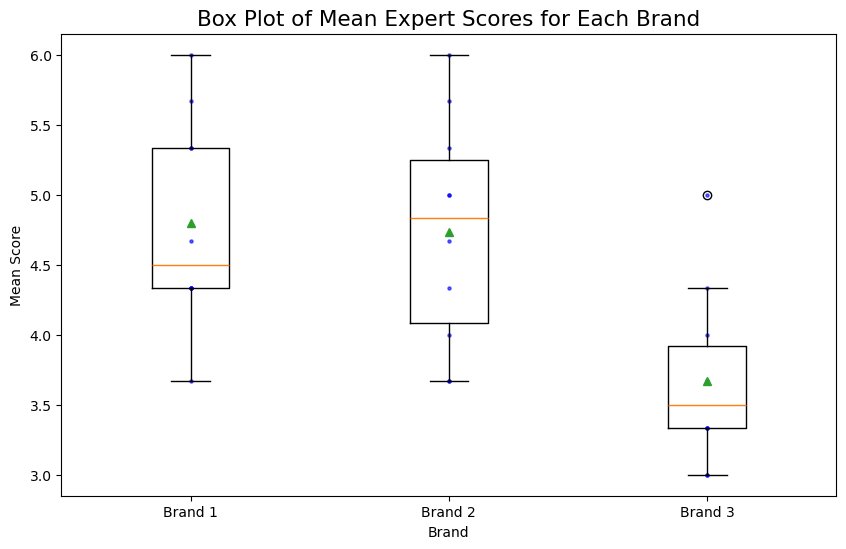

In [1255]:
# Calculate the mean scores of each expert
Brand_1_means = Brand_1_expert_opinions_df.mean(axis=1)
Brand_2_means = Brand_2_expert_opinions_df.mean(axis=1)
Brand_3_means = Brand_3_expert_opinions_df.mean(axis=1)

# Create a box plot for each brand
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)
ax.set_title('Box Plot of Mean Expert Scores for Each Brand', fontsize=15.5)
ax.set_ylabel('Mean Score')
ax.set_xlabel('Brand')

# Adding scatter plot of the observations
x_positions = [1, 2, 3]
for i, means in enumerate([Brand_1_means, Brand_2_means, Brand_3_means]):
    ax.scatter([x_positions[i]] * len(means), means, alpha=0.6, color='blue', s=5)

# Save the figure in .eps format

# save_path = os.path.join(working_directory, 'Bar_charts', 'brand_mean_scores_boxplot.eps')
# plt.tight_layout()
# plt.savefig(save_path, format='eps')

# Show the plot
plt.show()


In [1256]:
# Running the simulated example from the auxiliary module

# Call the simulated_example function with the provided parameters
_, primary_modeler_posterior_updated = auxiliary.simulated_example(
    primary_modeler_scores,  # Initial scores given by the primary modeler
    opinion_certainty_array,  # Certainty of the primary modeler's opinions
    apply_certainty,  # Flag to apply certainty
    number_of_responders,  # Number of responders for each brand
    trust_matrix,  # Trust matrix representing trust for each responder
    primary_modeler_score_preference,  # Primary modeler's score preference for each feature
    primary_modeler_brand_pref,  # Distribution representing primary modeler's brand prefference
    score_range,  # Highest possible score for each feature
    initial_feature_weight,  # Initial feature weight for the Dirichlet distribution
    Brand_1_expert_opinions,  # Expert opinions for Brand_1
    Brand_2_expert_opinions,  # Expert opinions for Brand_2
    Brand_3_expert_opinions  # Expert opinions for Brand_3
)


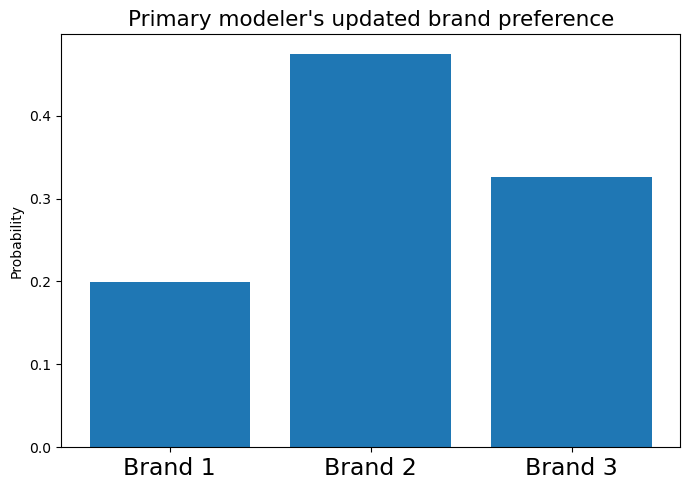

In [1257]:
## Plot primary modeler's initial and updated posterior distribution on brands

# Create a figure window with two subplots
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Variable names for the x-ticks
variable_names = ['Brand 1', 'Brand 2', 'Brand 3']

# Plotting the initial posterior distribution as a bar chart
axes.bar(variable_names, primary_modeler_posterior_updated)
axes.set_ylabel('Probability')
axes.set_title("Primary modeler's updated brand preference", fontsize=15.5)
axes.tick_params(axis='x', labelsize=17)

# Save the figure
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_5.eps')
plt.tight_layout()
plt.savefig(save_path, format='eps')

# Show the plots
plt.show()




<ins>The primary modeler's updated brand preference.</ins>

In [1258]:
# Round the values and convert them to percentage strings
primary_modeler_posterior_updated_percent = [f"{value * 100:.2f}%" for value in primary_modeler_posterior_updated]

# Create a DataFrame for the updated posterior percentages
primary_modeler_posterior_updated_df = pd.DataFrame(
    [primary_modeler_posterior_updated_percent],    # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]         # Column labels for the DataFrame
)

# Display the DataFrame
print("The Primary modeler's updated brand preference:")
primary_modeler_posterior_updated_df

The Primary modeler's updated brand preference:


,Brand 1,Brand 2,Brand 3
0,19.97%,47.45%,32.58%


The opinion certainty process works as intended in this example.

### Example 2
In this example the maximum opinion certainty $c_{I,b,n}$ = 1 in the primary modeler's low scores for the Brand_1 and Brand_2 brand should lead to the preference for the Brand_3 brand.

The primary modeler's opinion is configured to prefer the brands in the following order:

**Brand_3 > Brand_2 > Brand_1**. 

#### Experiment setup

##### Agent

In [1259]:
# The primary modeler's opinion

# Array representing the scores given by the primary modeler for different phone brands and features
# * Note 1: This array represents primary modelers opinion
primary_modeler_scores = np.array([
    [3, 1, 1],  # Scores for Brand_1
    [2, 3, 1],  # Scores for Brand_2
    [6, 5, 5]   # Scores for Brand_3
], dtype=np.int8)


In [1260]:
# Creating a DataFrame with the given data
# Index represents phone brands, and columns represent different features
primary_modeler_scores_df = pd.DataFrame(
    primary_modeler_scores,
    index=["Brand 1", "Brand 2", "Brand 3"],           # Setting the row labels for phone brands
    columns=["Feature 1", "Feature 2", "Feature 3"]  # Setting the column labels for features
)

# Display the DataFrame
primary_modeler_scores_df

,Feature 1,Feature 2,Feature 3
Brand 1,3,1,1
Brand 2,2,3,1
Brand 3,6,5,5


The primary modeler's certainty in the opinion $c_{I,b,n}$ for each brand is the following: 

In [1261]:
# Setting up the opinion certainty

# Array representing the certainty of the primary modeler's opinion for each phone brand
opinion_certainty_array = np.array([0.2, 0.2, 1], dtype=np.float16)

# Boolean flag to determine if certainty should be applied
# * Note 1: This flag is important as setting it to True will ensure that the opinion certainty array is ones.
apply_certainty = True

In [1262]:
# Round the values and convert them to percentage strings
opinion_certainty_percent = [f"{round(value * 100, 1)}%" for value in opinion_certainty_array]

# Create a DataFrame for opinion certainty percentages
opinion_certainty_df = pd.DataFrame(
    [opinion_certainty_percent],             # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]  # Column labels for the DataFrame
)

# Display the DataFrame
print("Opinion Certainty Table:")
opinion_certainty_df


Opinion Certainty Table:


,Brand 1,Brand 2,Brand 3
0,20.0%,20.0%,100.0%


Similarly to the previous example, low values of opinion certainty $c_{I,b,n}$ for Brand_1 and Brand_2, result in higher influence of the experts' opinion on the opinion of the primary modeler. This can be intuitively interpreted as the primary modeler being more receptive to advice from the experts $E_{i}$.

In [1263]:
# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded

# Array representing the number of responders for each phone brand
number_of_responders = np.array([10, 10, 10], dtype=np.int32)

In [1264]:
# Create a trust matrix with ones, representing equal trust for each responder
# The matrix has 3 rows (one for each phone brand) and 10 columns (one for each responder)
# * Note 1: Setting trust like this is equivalent to no inclusion of trust
trust_matrix = np.ones((3, 10), dtype=np.float16)

In [1265]:
# Primary modeler's score preference for each feature

# Array representing the primary modeler's score preference for each feature
# * Note 1: This means that scores below the selected scores are not taken into acoount durring the opinion formulation
primary_modeler_score_preference = np.array([4, 4, 4], dtype=np.int8)

In [1266]:
# Primary modeler's brand preference

# Array representing the primary modeler's initial brand preference
# * Note 1: Set to uniform
primary_modeler_brand_pref = np.array([1, 1, 1], dtype=np.float32)

# Normalize the brand preference so that the sum equals 1
primary_modeler_brand_pref = primary_modeler_brand_pref / np.sum(primary_modeler_brand_pref)


In [1267]:
# Setting score range

# This represents the highest possible score for each feature, i.e., score range = 'best'
score_range = 6

In [1268]:
# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value

# Initial feature weight for the Dirichlet distribution
initial_feature_weight = 0.01


##### Expert opinions

In [1269]:
# Simulated experts for Brand_1
# Array representing the opinions of 10 simulated experts on Brand_1 for 3 features
Brand_1_expert_opinions = np.array([
    [4, 3, 4], [5, 3, 5], [5, 6, 5], [6, 5, 3], [6, 6, 6], 
    [5, 6, 5], [6, 6, 5], [6, 3, 4], [4, 5, 4], [6, 4, 3]
], dtype=np.int8)

# Simulated experts for Brand_2
# Array representing the opinions of 10 simulated experts on Brand_2 for 3 features
Brand_2_expert_opinions = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
], dtype=np.int8)

# Simulated experts for Brand_3
# Array representing the opinions of 10 simulated experts on Brand_3 for 3 features
Brand_3_expert_opinions = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
], dtype=np.int8)


In [1270]:
# Creating DataFrames for each brand

# DataFrame for Brand_1 expert opinions
Brand_1_expert_opinions_df = pd.DataFrame(
    Brand_1_expert_opinions, 
    index=[f"Brand_1 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_2 expert opinions
Brand_2_expert_opinions_df = pd.DataFrame(
    Brand_2_expert_opinions,
    index=[f"Brand_2 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_3 expert opinions
Brand_3_expert_opinions_df = pd.DataFrame(
    Brand_3_expert_opinions, 
    index=[f"Brand_3 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

<ins>Simple inference of experts opinion of brands</ins>

/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_98799/841215693.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)


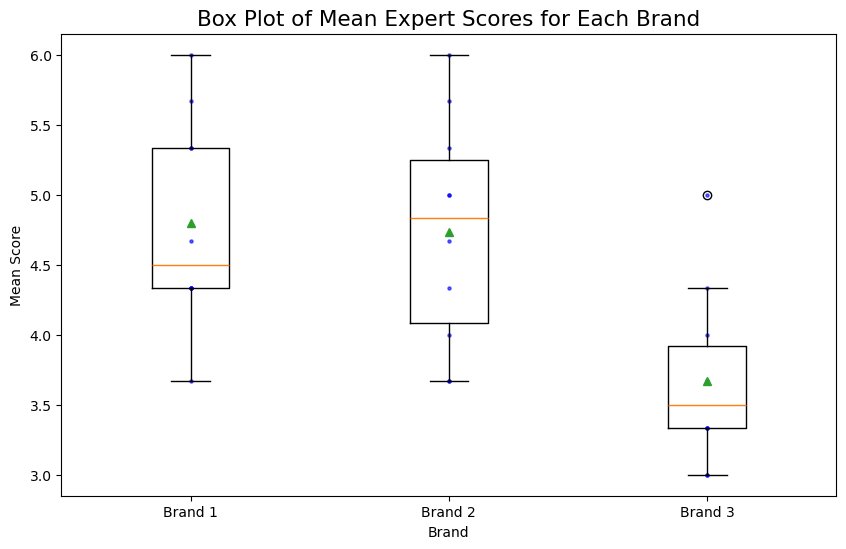

In [1271]:
# Calculate the mean scores of each expert
Brand_1_means = Brand_1_expert_opinions_df.mean(axis=1)
Brand_2_means = Brand_2_expert_opinions_df.mean(axis=1)
Brand_3_means = Brand_3_expert_opinions_df.mean(axis=1)

# Create a box plot for each brand
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)
ax.set_title('Box Plot of Mean Expert Scores for Each Brand', fontsize=15.5)
ax.set_ylabel('Mean Score')
ax.set_xlabel('Brand')

# Adding scatter plot of the observations
x_positions = [1, 2, 3]
for i, means in enumerate([Brand_1_means, Brand_2_means, Brand_3_means]):
    ax.scatter([x_positions[i]] * len(means), means, alpha=0.6, color='blue', s=5)

# Save the figure in .eps format

# save_path = os.path.join(working_directory, 'Bar_charts', 'brand_mean_scores_boxplot.eps')
# plt.tight_layout()
# plt.savefig(save_path, format='eps')

# Show the plot
plt.show()


In [1272]:
# Running the simulated example from the auxiliary module

# Call the simulated_example function with the provided parameters
_, primary_modeler_posterior_updated = auxiliary.simulated_example(
    primary_modeler_scores,  # Initial scores given by the primary modeler
    opinion_certainty_array,  # Certainty of the primary modeler's opinions
    apply_certainty,  # Flag to apply certainty
    number_of_responders,  # Number of responders for each brand
    trust_matrix,  # Trust matrix representing trust for each responder
    primary_modeler_score_preference,  # Primary modeler's score preference for each feature
    primary_modeler_brand_pref,  # Distribution representing primary modeler's brand prefference
    score_range,  # Highest possible score for each feature
    initial_feature_weight,  # Initial feature weight for the Dirichlet distribution
    Brand_1_expert_opinions,  # Expert opinions for Brand_1
    Brand_2_expert_opinions,  # Expert opinions for Brand_2
    Brand_3_expert_opinions  # Expert opinions for Brand_3
)


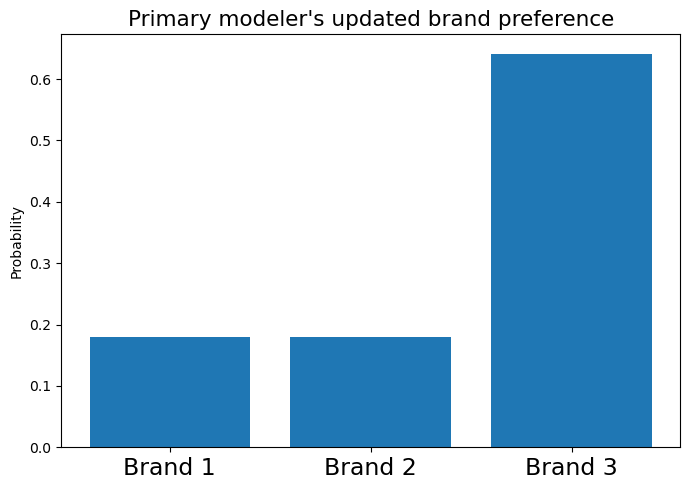

In [1273]:
## Plot primary modeler's initial and updated posterior distribution on brands

# Create a figure window with two subplots
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Variable names for the x-ticks
variable_names = ['Brand 1', 'Brand 2', 'Brand 3']

# Plotting the updated posterior distribution as a bar chart
axes.bar(variable_names, primary_modeler_posterior_updated)
axes.set_ylabel('Probability')
axes.set_title("Primary modeler's updated brand preference", fontsize=15.5)
axes.tick_params(axis='x', labelsize=17)

# Save the figure
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_6.eps')
plt.tight_layout()
plt.savefig(save_path, format='eps')

# Show the plots
plt.show()


<ins>The primary modeler's updated brand preference.</ins>

In [1274]:
# Round the values and convert them to percentage strings
primary_modeler_posterior_updated_percent = [f"{value * 100:.2f}%" for value in primary_modeler_posterior_updated]

# Create a DataFrame for the updated posterior percentages
primary_modeler_posterior_updated_df = pd.DataFrame(
    [primary_modeler_posterior_updated_percent],    # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]         # Column labels for the DataFrame
)

# Display the DataFrame
print("The Primary modeler's updated brand preference:")
primary_modeler_posterior_updated_df

The Primary modeler's updated brand preference:


,Brand 1,Brand 2,Brand 3
0,17.95%,17.95%,64.09%


The opinion certainty process works as intended in this example.

### Example 3
In this example the maximum opinion certainty $c_{I,b,n}$ = 1 in the primary modeler's lowest scores for Brand_1 brand should lead to the preference for the Brand_2 brand.

The primary modeler's opinion is configured to prefer the brands in the following order:

**Brand_2 > Brand_3 > Brand_1**. 

#### Experiment setup

##### Agent

In [1275]:
# The primary modeler's opinion

# Array representing the scores given by the primary modeler for different phone brands and features
# * Note 1: This array represents primary modelers opinion
primary_modeler_scores = np.array([
    [1, 1, 1],  # Scores for Brand_1
    [6, 5, 6],  # Scores for Brand_2
    [4, 4, 3]   # Scores for Brand_3
], dtype=np.int8)


In [1276]:
# Creating a DataFrame with the given data
# Index represents phone brands, and columns represent different features
primary_modeler_scores_df = pd.DataFrame(
    primary_modeler_scores,
    index=["Brand 1", "Brand 2", "Brand 3"],           # Setting the row labels for phone brands
    columns=["Feature 1", "Feature 2", "Feature 3"]  # Setting the column labels for features
)

# Display the DataFrame
primary_modeler_scores_df

,Feature 1,Feature 2,Feature 3
Brand 1,1,1,1
Brand 2,6,5,6
Brand 3,4,4,3


Additionally, to simulate an issue with this design, all the experts' opinions for Brand_1 are deliberately set to the highest scores.

The primary modeler's certainty in the opinion $c_{I,b,n}$ for each brand is the following: 

In [1277]:
# Setting up the opinion certainty

# Array representing the certainty of the primary modeler's opinion for each phone brand
opinion_certainty_array = np.array([1, 0, 0], dtype=np.float16)

# Boolean flag to determine if certainty should be applied
# * Note 1: This flag is important as setting it to True will ensure that the opinion certainty array is ones.
apply_certainty = True

In [1278]:
# Round the values and convert them to percentage strings
opinion_certainty_percent = [f"{round(value * 100, 1)}%" for value in opinion_certainty_array]

# Create a DataFrame for opinion certainty percentages
opinion_certainty_df = pd.DataFrame(
    [opinion_certainty_percent],             # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]  # Column labels for the DataFrame
)

# Display the DataFrame
print("Opinion Certainty Table:")
opinion_certainty_df

Opinion Certainty Table:


,Brand 1,Brand 2,Brand 3
0,100.0%,0.0%,0.0%


In [1279]:
# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded

# Array representing the number of responders for each phone brand
number_of_responders = np.array([10, 10, 10], dtype=np.int32)

In [1280]:
# Create a trust matrix with ones, representing equal trust for each responder
# The matrix has 3 rows (one for each phone brand) and 10 columns (one for each responder)
# * Note 1: Setting trust like this is equivalent to no inclusion of trust
trust_matrix = np.ones((3, 10), dtype=np.float16)

In [1281]:
# Primary modeler's score preference for each feature

# Array representing the primary modeler's score preference for each feature
# * Note 1: This means that scores below the selected scores are not taken into acoount durring the opinion formulation
primary_modeler_score_preference = np.array([4, 4, 4], dtype=np.int8)

In [1282]:
# Primary modeler's brand preference

# Array representing the primary modeler's initial brand preference
# * Note 1: Set to uniform
primary_modeler_brand_pref = np.array([1, 1, 1], dtype=np.float16)

# Normalize the brand preference so that the sum equals 1
primary_modeler_brand_pref = primary_modeler_brand_pref / np.sum(primary_modeler_brand_pref)


In [1283]:
# Setting score range

# This represents the highest possible score for each feature, i.e., score range = 'best'
score_range = 6

In [1284]:
# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value

# Initial feature weight for the Dirichlet distribution
initial_feature_weight = 0.01


When opinion certainty values $c_{I,b,n}$ for Brand_2 and Brand_3 are set to zero, it results in the complete influence of the experts' opinions on the primary modeler's own opinion. This can be intuitively interpreted as the primary modeler completely replacing his own opinion with the opinions of the experts $E_{i}$.

##### Expert opinions

In [1285]:
# Simulated experts for Brand_1
# Array representing the opinions of 10 simulated experts on Brand_1 for 3 features
Brand_1_expert_opinions = np.array([
    [6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6], 
    [6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6]
], dtype=np.int8)

# Simulated experts for Brand_2
# Array representing the opinions of 10 simulated experts on Brand_2 for 3 features
Brand_2_expert_opinions = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
], dtype=np.int8)

# Simulated experts for Brand_3
# Array representing the opinions of 10 simulated experts on Brand_3 for 3 features
Brand_3_expert_opinions = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
], dtype=np.int8)

In [1286]:
# Creating DataFrames for each brand

# DataFrame for Brand_1 expert opinions
Brand_1_expert_opinions_df = pd.DataFrame(
    Brand_1_expert_opinions, 
    index=[f"Brand_1 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_2 expert opinions
Brand_2_expert_opinions_df = pd.DataFrame(
    Brand_2_expert_opinions,
    index=[f"Brand_2 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

# DataFrame for Brand_3 expert opinions
Brand_3_expert_opinions_df = pd.DataFrame(
    Brand_3_expert_opinions, 
    index=[f"Brand_3 expert {i+1}" for i in range(10)],  # Setting index as expert identifiers
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"]  # Setting the column labels for features
)

<ins>Simple inference of experts opinion of brands</ins>

/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_98799/841215693.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)


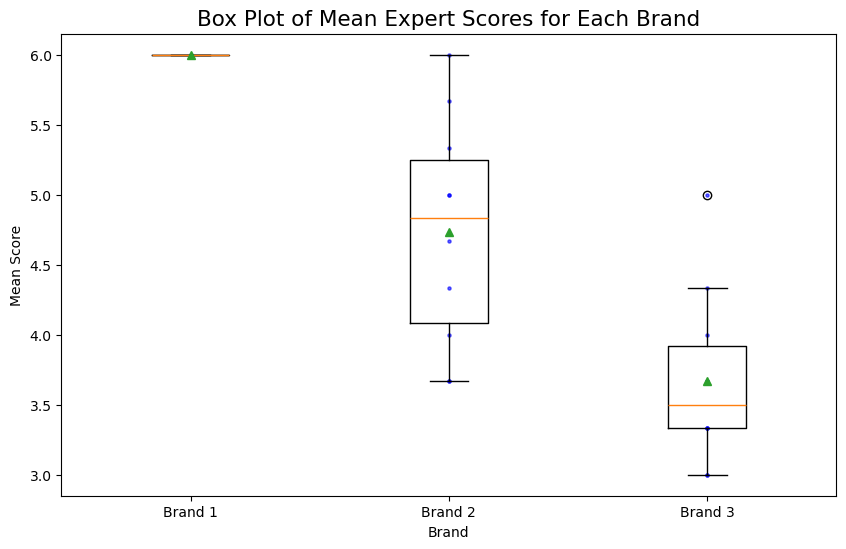

In [1287]:
# Calculate the mean scores of each expert
Brand_1_means = Brand_1_expert_opinions_df.mean(axis=1)
Brand_2_means = Brand_2_expert_opinions_df.mean(axis=1)
Brand_3_means = Brand_3_expert_opinions_df.mean(axis=1)

# Create a box plot for each brand
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([Brand_1_means, Brand_2_means, Brand_3_means], labels=["Brand 1", "Brand 2", "Brand 3"], showmeans=True)
ax.set_title('Box Plot of Mean Expert Scores for Each Brand', fontsize=15.5)
ax.set_ylabel('Mean Score')
ax.set_xlabel('Brand')

# Adding scatter plot of the observations
x_positions = [1, 2, 3]
for i, means in enumerate([Brand_1_means, Brand_2_means, Brand_3_means]):
    ax.scatter([x_positions[i]] * len(means), means, alpha=0.6, color='blue', s=5)

# Save the figure in .eps format

# save_path = os.path.join(working_directory, 'Bar_charts', 'brand_mean_scores_boxplot.eps')
# plt.tight_layout()
# plt.savefig(save_path, format='eps')

# Show the plot
plt.show()


In [1288]:
# Running the simulated example from the auxiliary module

# Call the simulated_example function with the provided parameters
_, primary_modeler_posterior_updated = auxiliary.simulated_example(
    primary_modeler_scores,  # Initial scores given by the primary modeler
    opinion_certainty_array,  # Certainty of the primary modeler's opinions
    apply_certainty,  # Flag to apply certainty
    number_of_responders,  # Number of responders for each brand
    trust_matrix,  # Trust matrix representing trust for each responder
    primary_modeler_score_preference,  # Primary modeler's score preference for each feature
    primary_modeler_brand_pref,  # Distribution representing primary modeler's brand prefference
    score_range,  # Highest possible score for each feature
    initial_feature_weight,  # Initial feature weight for the Dirichlet distribution
    Brand_1_expert_opinions,  # Expert opinions for Brand_1
    Brand_2_expert_opinions,  # Expert opinions for Brand_2
    Brand_3_expert_opinions  # Expert opinions for Brand_3
)


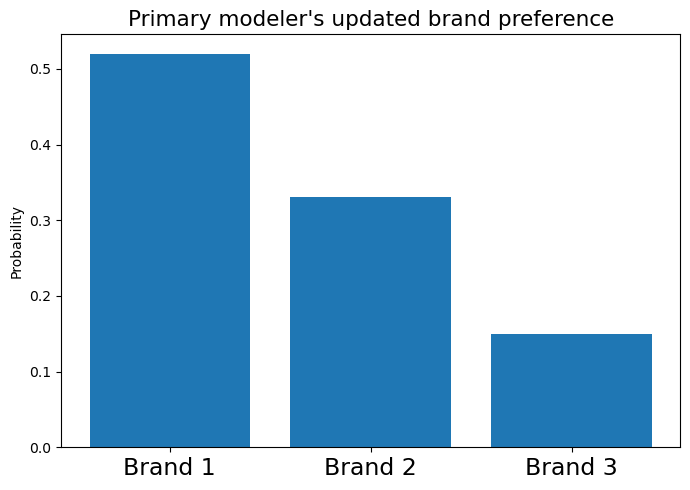

In [1289]:
## Plot primary modeler's initial and updated posterior distribution on brands

# Create a figure window with two subplots
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Variable names for the x-ticks
variable_names = ['Brand 1', 'Brand 2', 'Brand 3']

# Plotting the updated posterior distribution as a bar chart
axes.bar(variable_names, primary_modeler_posterior_updated)
axes.set_ylabel('Probability')
axes.set_title("Primary modeler's updated brand preference", fontsize=15.5)
axes.tick_params(axis='x', labelsize=17)

# Save the figure
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_7.eps')
plt.tight_layout()
plt.savefig(save_path, format='eps')

# Show the plots
plt.show()


<ins>The primary modeler's updated brand preference.</ins>

In [1290]:
# Round the values and convert them to percentage strings
primary_modeler_posterior_updated_percent = [f"{value * 100:.2f}%" for value in primary_modeler_posterior_updated]

# Create a DataFrame for the updated posterior percentages
primary_modeler_posterior_updated_df = pd.DataFrame(
    [primary_modeler_posterior_updated_percent],    # Percentage values as a list
    columns=["Brand 1", "Brand 2", "Brand 3"]         # Column labels for the DataFrame
)

# Display the DataFrame
print("The Primary modeler's updated brand preference:")
primary_modeler_posterior_updated_df

The Primary modeler's updated brand preference:


,Brand 1,Brand 2,Brand 3
0,51.97%,33.10%,14.93%


In this scenario, an unexpected outcome occurs due to the way each expert's $E_{i}$ contribution to the updated weight $V_{f_{j,b}}$ and the primary modeler's contribution are configured. In particular:

 1. Each expert's contribution to the updated weight $V_{f_{i,b}}$ has a magnitude of +1.
 2. The primary modeler's contribution to the updated weight $V_{f_{i,b}}$ is also +1 for each expert, given that opinion certainty $c_{I,b,n}$ is set to the maximum value of 1.

As a result, the updated weight becomes $V_{i_{Brand_1}}$ = 10 for all $i\in \{1,2,3\}$. This leads to high maximum values for the respective probabilities $P_{I}^{0}(F_{i,Brand_1}|Brand_1)$ for all $i\in \{1,2,3\}$, of choosing the underlying scores. Consequently, the probabilities entering the final posterior distribution on brands $P_{I}^{0}(F_{1,Brand_1}|Brand_1)P_{I}^{0}(F_{2,Brand_1}|Brand_1)P_{I}^{0}(F_{3,Brand_1}|Brand_1)$ remain high, resulting in the selection of the Brand_1 brand, contrary to the expected outcome.